Ejercicio 2 
===========

In [1]:
#from Ejercicio1.Ejercicio1 import springs
from importlib.machinery import SourceFileLoader
import matplotlib.pyplot as plt
import numpy as np
plt.rc('figure', figsize=(10,8))
plt.rc('axes', labelsize=18)
from IPython.display import DisplayObject

In [2]:
import sys
import os

In [3]:
sys.path.insert(0,os.path.pardir)
import mefmods as mef

Los elementos que necesito para resolver el problema estan en este módulo:

In [4]:
import Ejercicio2

# Problema de la ménsula

El archivo `Mensula.g` contiene el mallado y las condiciones de contorno para la ménsula

In [5]:
! cat Mensula.g

GL
2
NODES
3
0.  0. 0  
1.  0. 0
1. 1. 0
ELEMENTS
3 2
2 0 1 1 200 
2 1 2 1 200 
2 2 0 1 200 
VINS
3
0 1 1 0 0
1 -1 1 0 0
2 -1 -1 100 0
# node  vin=1: desplazamiento, vin = -1: fuerza
# node  vinx viny valvinx valviny


In [6]:
M = Ejercicio2.Grilla(gefile='Mensula.g', case='Mensula')
#P = Ejerccio2.Grilla(gefile='Ejercicio2/Puente.ge', case='Puente', pltscale=100)

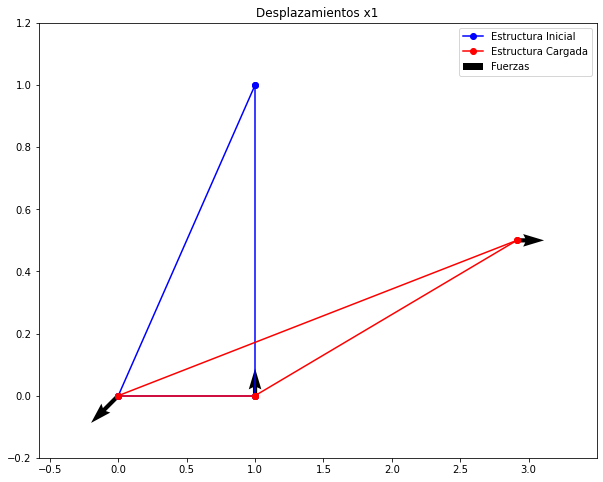

In [7]:
M.plotmesh(scale=1)

In [8]:
LocalKsM = mef.read_local_matrices('MatricesElementales-Mensula.dat')

In [9]:
LocalKsM

[array([[ 200.,    0., -200.,    0.],
        [   0.,    0.,    0.,    0.],
        [-200.,    0.,  200.,    0.],
        [   0.,    0.,    0.,    0.]]),
 array([[   0.,    0.,    0.,    0.],
        [   0.,  200.,    0., -200.],
        [   0.,    0.,    0.,    0.],
        [   0., -200.,    0.,  200.]]),
 array([[ 70.71068,  70.71068, -70.71068, -70.71068],
        [ 70.71068,  70.71068, -70.71068, -70.71068],
        [-70.71068, -70.71068,  70.71068,  70.71068],
        [-70.71068, -70.71068,  70.71068,  70.71068]])]

In [10]:
M.MC

array([[0, 1],
       [1, 2],
       [2, 0]])

In [11]:
M.MN

array([[0., 0., 0.],
       [1., 0., 0.],
       [1., 1., 0.]])

In [12]:
M.U

array([[ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 1.91421356],
       [-0.5       ]])

# Problema del Puente

In [13]:
%load_ext itikz

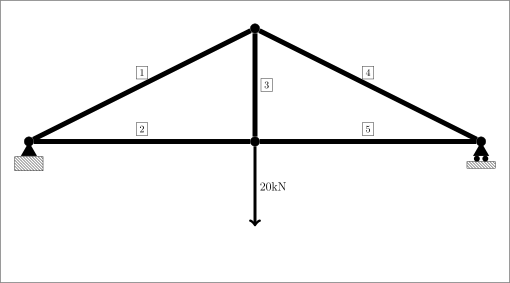

In [15]:
%%itikz
% requiere latex + itikz (https://github.com/jbn/itikz) + pdf2svg 
\documentclass[tikz]{standalone}
\usepackage{amsmath}
\usetikzlibrary{patterns,positioning, shapes}
\newcommand*\circled[1]{\tikz[baseline=(char.base)]{
    \node[shape=circle,draw,inner sep=2pt,minimum size=0pt] (char) {#1};}} 
\newcommand*\mytriangle{
    \node[regular polygon, regular polygon sides = 3, minimum size=0.5cm] {};
}
\newcommand*{\force}{20kN}
\newcommand*{\Euno}{2}
\newcommand*{\Edos}{5}
\newcommand*{\Etre}{4}
\newcommand*{\Ecua}{1}
\newcommand*{\Ecin}{3}

\begin{document}

  \begin{tikzpicture}[
      vinculo/.style={regular polygon, regular polygon sides=3, anchor=north, fill=black, minimum size=15pt},
      vinculofijo/.style={rectangle, anchor=north, pattern=north west lines,draw,
                          minimum height=0.5cm, minimum width=1cm},
      wheel/.style={fill=black, circle, minimum height=6pt, inner sep =0}
  ]
    \draw[fill=white] (-1,-5) rectangle (17,5);
    \node[circle, draw, fill=black ] (N1) at (0,0)  {};
    \node[circle, draw, fill=black] (N2) at (8,0)  {};
    \node[circle, draw, fill=black] (N3) at (16,0) {};
    \node[circle, draw, fill=black] (N4) at (8,4)  {};
    
    \draw[line width=5] (N1) -- (N2) node[pos=0.5, above] {\fbox{\Euno}};
    \draw[line width=5] (N2) -- (N3) node[pos=0.5, above] {\fbox{\Edos}};
    \draw[line width=5] (N3) -- (N4) node[pos=0.5, above] {\fbox{\Etre}};
    \draw[line width=5] (N4) -- (N1) node[pos=0.5, above] {\fbox{\Ecua}};
    \draw[line width=5] (N2) -- (N4) node[pos=0.5, right] {\fbox{\Ecin}};
        
    \node[vinculo] at (N1) {};
    \node[vinculofijo, below=15pt] at (N1) {};
    \node[vinculo] at (N3) {};
%    \draw[] (N3) node[wheel,below left=15pt and 2pt] {} -- node[wheel, below right=15pt and 2pt] at (N3) {};
    \draw[] (N3) node[wheel, below left=15pt and 2pt] {} -- (N3) node[wheel, below right=15pt and 2pt] {};
    \node[vinculofijo, below=20pt, minimum height=0.2cm] at (N3) {};
    \draw[->, line width=3]  (N2) -- ++(0,-3cm) node[right, pos=0.5] {\large\force};
    
  \end{tikzpicture}

\end{document}

In [16]:
P = Ejercicio2.Grilla(gefile='Puente.ge', case='Puente')

In [17]:
P.MC

array([[0, 3],
       [0, 1],
       [1, 3],
       [2, 3],
       [1, 2]])

In [18]:
P.MN

array([[ 0.,  0.,  0.],
       [ 8.,  0.,  0.],
       [16.,  0.,  0.],
       [ 8.,  4.,  0.]])

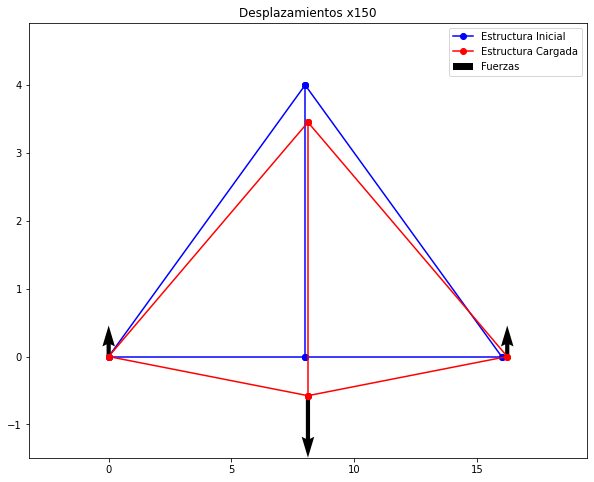

In [19]:
P.plotmesh(scale=150)

In [20]:
P.K

array([[ 4.50329710e+07,  9.39148551e+06, -2.62500000e+07,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -1.87829710e+07, -9.39148551e+06],
       [ 9.39148551e+06,  4.69574275e+06,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -9.39148551e+06, -4.69574275e+06],
       [-2.62500000e+07,  0.00000000e+00,  5.25000000e+07,
         0.00000000e+00, -2.62500000e+07,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.05000000e+08,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -1.05000000e+08],
       [ 0.00000000e+00,  0.00000000e+00, -2.62500000e+07,
         0.00000000e+00,  4.50329710e+07, -9.39148551e+06,
        -1.87829710e+07,  9.39148551e+06],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -9.39148551e+06,  4.69574275e+06,
         9.39148551e+06, -4.69574275e+06],
       [-1.87829710e+07, -9.391485

In [21]:
P.U

array([[ 0.        ],
       [ 0.        ],
       [ 0.0007619 ],
       [-0.00384387],
       [ 0.00152381],
       [ 0.        ],
       [ 0.0007619 ],
       [-0.0036534 ]])

In [22]:
P.F

array([[-7.27595761e-12],
       [ 1.00000000e+04],
       [ 0.00000000e+00],
       [-2.00000000e+04],
       [ 0.00000000e+00],
       [ 1.00000000e+04],
       [ 0.00000000e+00],
       [ 0.00000000e+00]])

In [23]:
LocalKsP = mef.read_local_matrices('MatricesElementales-Puente.dat')

In [24]:
LocalKsP

[array([[ 18782970. ,   9391485. , -18782970. ,  -9391485. ],
        [  9391485. ,   4695742.5,  -9391485. ,  -4695742.5],
        [-18782970. ,  -9391485. ,  18782970. ,   9391485. ],
        [ -9391485. ,  -4695742.5,   9391485. ,   4695742.5]]),
 array([[ 26250000.,         0., -26250000.,         0.],
        [        0.,         0.,         0.,         0.],
        [-26250000.,         0.,  26250000.,         0.],
        [        0.,         0.,         0.,         0.]]),
 array([[ 0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00],
        [ 0.00e+00,  1.05e+08,  0.00e+00, -1.05e+08],
        [ 0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00],
        [ 0.00e+00, -1.05e+08,  0.00e+00,  1.05e+08]]),
 array([[ 18782970. ,  -9391485. , -18782970. ,   9391485. ],
        [ -9391485. ,   4695742.5,   9391485. ,  -4695742.5],
        [-18782970. ,   9391485. ,  18782970. ,  -9391485. ],
        [  9391485. ,  -4695742.5,  -9391485. ,   4695742.5]]),
 array([[ 26250000.,         0., -26250000.,    

In [26]:
P.R

array([2, 3, 4, 6, 7])

P.S

In [27]:
P.S

array([0, 1, 5])

In [28]:
P.F

array([[-7.27595761e-12],
       [ 1.00000000e+04],
       [ 0.00000000e+00],
       [-2.00000000e+04],
       [ 0.00000000e+00],
       [ 1.00000000e+04],
       [ 0.00000000e+00],
       [ 0.00000000e+00]])